## Import software libraries

Import the primary modules that will be used in this project:

In [1]:
import os  # Interact with the operating system
import sys  # Read system parameters

import matplotlib  # Create 2D charts
import numpy as np  # Work with multi-dimensional arrays and matrices
import pandas as pd  # Manipulate and analyze data
import scipy as sp  # Perform scientific computing and advanced mathematics
import seaborn as sb  # Perform data visualization
import sklearn  # Perform data mining and analysis

# Summarize software libraries used
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- Pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- SciPy {}".format(sp.__version__))
print("- Scikit-learn {}".format(sklearn.__version__))
print("- Python {}\n".format(sys.version))

Libraries used in this project:
- NumPy 1.24.3
- Pandas 2.0.3
- Matplotlib 3.7.2
- SciPy 1.10.1
- Scikit-learn 1.3.2
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]



## Load the Dataset

To analyze the price of a home  through multiple inputs in King County, load the dataset into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized with pandas.

In [2]:
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "housing_data")
print("Data files in this project:", os.listdir(DATA_PATH))

# Read the raw dataset
raw_housing_data_file = os.path.join(DATA_PATH, "kc_house_data.csv")
raw_housing_data = pd.read_csv(raw_housing_data_file)
print(
    "Loaded {} records from {}.\n".format(len(raw_housing_data), raw_housing_data_file)
)

Data files in this project: ['.ipynb_checkpoints', 'kc_house_data.csv']
Loaded 21613 records from ./housing_data/kc_house_data.csv.



## Dataset Information


#### View features and data types

Column Labels:
- **id**—Unique identifier for each house sold.
- **date**—Date of the house's most recent sale.
- **price**—Price the house most recently sold for.
- **bedrooms**—Number of bedrooms in the house.
- **bathrooms**—Number of bathrooms. A room with a toilet but no shower is counted as 0.5.
- **sqft_living**—Square footage of the house's interior living space.
- **sqft_lot**—Square footage of the lot on which the house is located.
- **floors**—Number of floor levels in the house.
- **waterfront**—Whether the property borders on or contains a body of water. (0 = not waterfront, 1 =
waterfront)
- **view**—An index from 0 to 4 representing the subjective quality of the view from the property. The
higher the number, the better the view.
- **condition**—An index from 1 to 5 representing the subjective condition of the property. The higher
the number, the better the condition.
- **grade**—An index from 0 to 14 representing the quality of the building's construction and design.
The higher the number, the better the grade.
- **sqft_above**The square footage of the interior housing space that is above ground level.
- **sqft_basement**—The square footage of the interior housing space that is below ground level.
- **yr_built**—The year the house was initially built.
- **yr_renovated**—The year of the house's last renovation.
- **zipcode**—What zipcode area the house is located within.
- **lat**—Latitude of the house's location.
- **long**—Longitude of the house's location.
- **sqft_living15**—The square footage of interior housing living space for the nearest 15 neighbors.
- **sqft_lot15**—The square footage of the lan

In [3]:
print(raw_housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- 21,613 records ("entries" regarding a particular house) are in the dataset.
- There are 21 columns in the dataset.
- Each column in the dataset is listed, along with its data type and the number of records that
include a data value.
- Five columns contain floating point number values: price, bathrooms, floors, lat, and
long.
- Fifteen columns contain integer number values: id, bedrooms, sqft_living, sqft_lot,
waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built,
yr_renovated, zipcode, sqft_living15, and sqft_lot15.
- One column (date) contains a date value (reported as an "object" value).
- There are no missing data values. Each column contains 21,613 entries.

### Display samples

You can see significant variation in prices, number of bedrooms and bathrooms, living space, even in this small sample.

In [4]:
# View first ten records
print(raw_housing_data.head(10))

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

## Data Characteristics - Statistical Measures

### Descriptive summary statistics

In [5]:
with pd.option_context("float_format", "{:.2f}".format):
    print(raw_housing_data.describe())

                 id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21613.00   21613.00  21613.00   21613.00     21613.00   21613.00   
mean  4580301520.86  540088.14      3.37       2.11      2079.90   15106.97   
std   2876565571.31  367127.20      0.93       0.77       918.44   41420.51   
min      1000102.00   75000.00      0.00       0.00       290.00     520.00   
25%   2123049194.00  321950.00      3.00       1.75      1427.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900445.00  645000.00      4.00       2.50      2550.00   10688.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  \
count 21613.00    21613.00 21613.00   21613.00 21613.00    21613.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.39   
std       0.54        0.09     0.77       0.65     1.18      828.09   
min 

### Summarize the most common values


In [6]:
# Summarize most common values for features with non-continuous or categorical values
features_to_summarize = [
    "view",
    "waterfront",
    "grade",
    "zipcode",
    "bedrooms",
    "bathrooms",
    "floors",
]
raw_housing_data[features_to_summarize].mode()

,view,waterfront,grade,zipcode,bedrooms,bathrooms,floors
0,0,0,7,98103,3,2.5,1.0


The typical house:
- Does not have a "view" and is not on the waterfront.
- Has a grade of 7.
- Has a zipcode of 98103.
- Has 3 bedrooms, 2.5 bathrooms, and 1 floor level.

### Show feature correlations with price

Convert **date** column to datetime in preparation for Pearson's Correlation Coefficient

In [7]:
print("'date' column before conversion:\n")
print(raw_housing_data.date.info())
raw_housing_data.date = pd.to_datetime(raw_housing_data.date)
print("'date' column after conversion:\n")
print(raw_housing_data.date.info())

'date' column before conversion:

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
21613 non-null  object
dtypes: object(1)
memory usage: 169.0+ KB
None
'date' column after conversion:

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21613 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.0 KB
None


#### Calculate Pearson's Correlation Coefficient

- **sqft_living** is the feature that has the strongest correlation to **price**
- condition, sqft_lot15, sqft_lot, and waterfront have weak correlations to price
- The perfect 1.0 for price can be dsiregarded as it simply indicates that price perfectly correlates with itself.

In [8]:
# # Look for correlations with price using Pearson correlation coefficient
print("Pearson correlations with price")
corr_matrix = raw_housing_data.corr()
corr_matrix["price"].sort_values(ascending=False)

Pearson correlations with price


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Analyze cross correlations

Use Matplotlib for visualizing the correlation matrix

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

1. Define the visualization's size and title and plot the correlation matrix as a heatmap.

2. Reorder the features to align with Pearson's Correlation output above for visualization purposes.

    - Starting with price will make it easier to compare the other features to it. 

3. Use Seaborn library to plot the correlation matrix as a heatmap


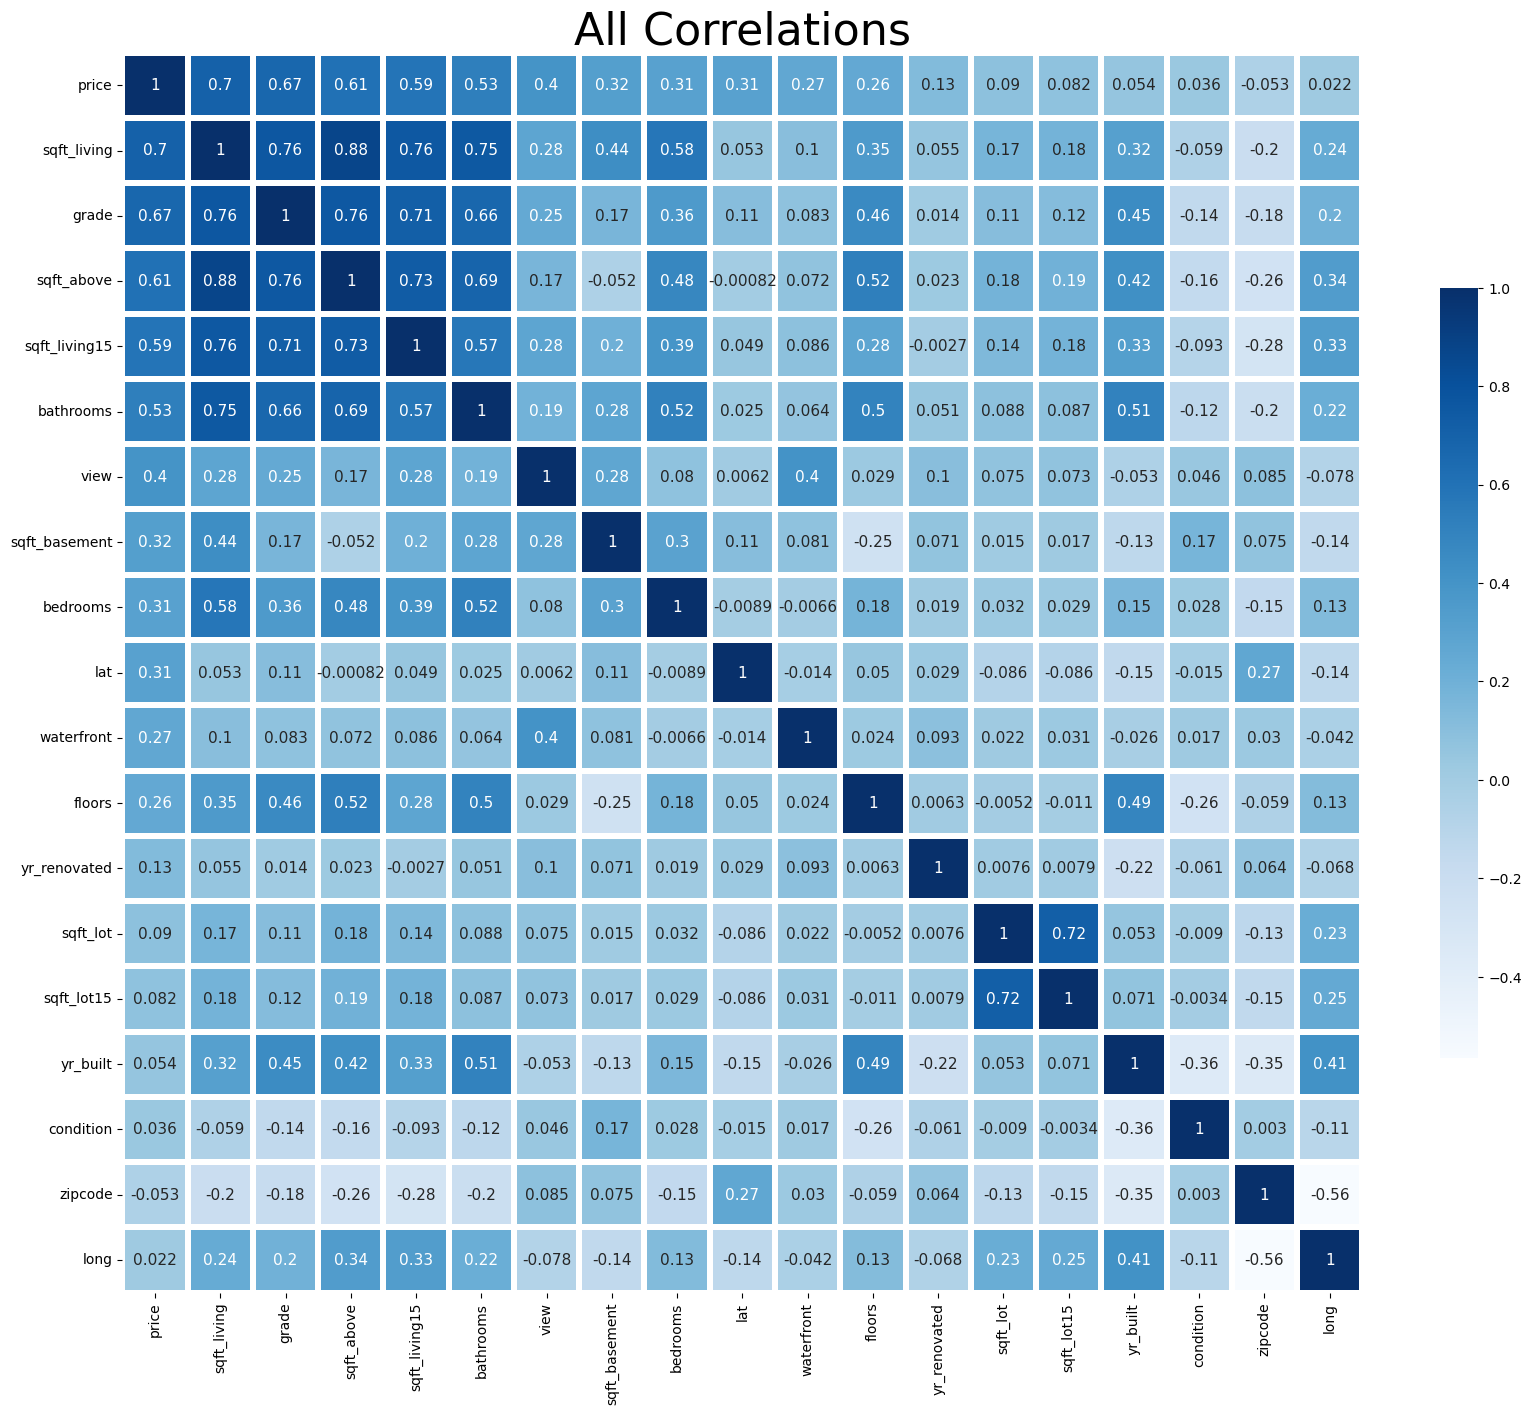

In [10]:
f, axes = plt.subplots(figsize=(20, 20))
plt.title("All Correlations", fontsize=32)

features = [
    "price",
    "sqft_living",
    "grade",
    "sqft_above",
    "sqft_living15",
    "bathrooms",
    "view",
    "sqft_basement",
    "bedrooms",
    "lat",
    "waterfront",
    "floors",
    "yr_renovated",
    "sqft_lot",
    "sqft_lot15",
    "yr_built",
    "condition",
    "zipcode",
    "long",
]

#  Plot the correlation matrix as a heatmap using the Seaborn library
sb.heatmap(
    raw_housing_data[features].corr(),
    linewidths=3.0,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 11},
    cbar_kws={"shrink": 0.5},
);

### Visualize the distribution of features using a histogram

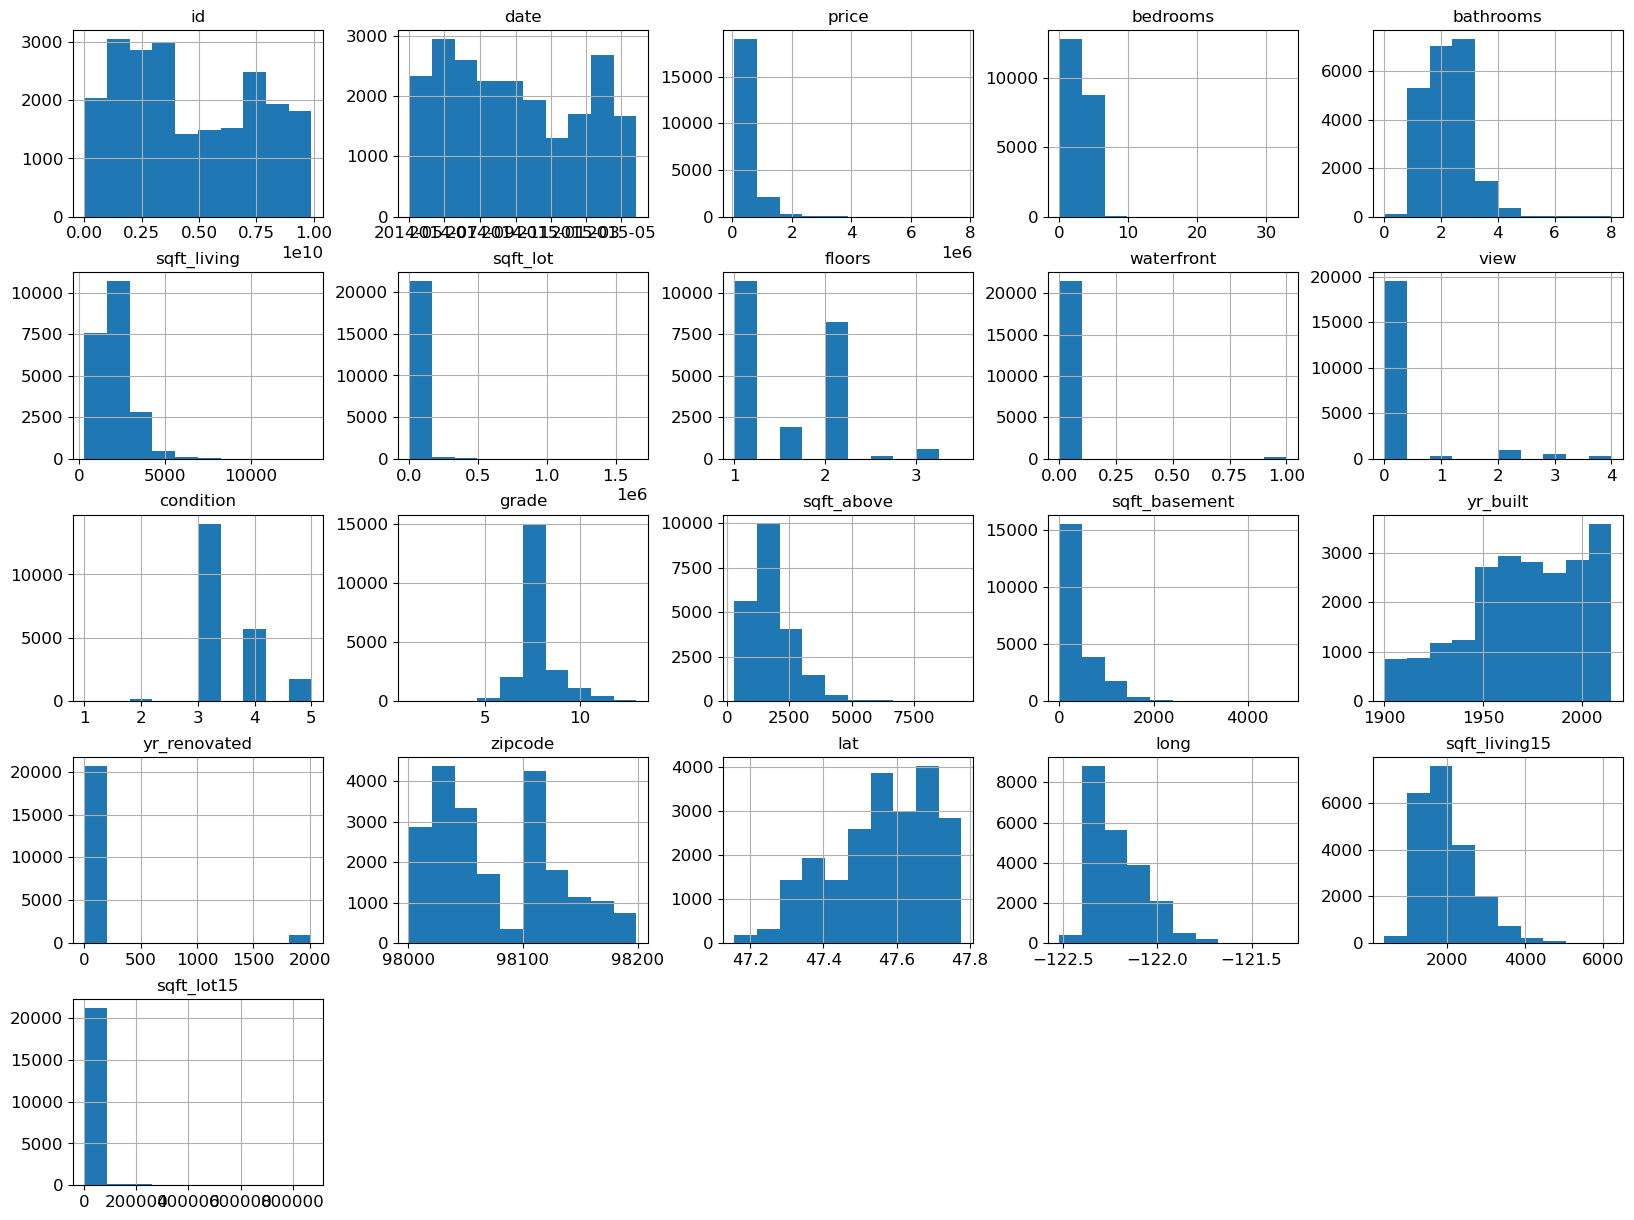

<Figure size 640x480 with 0 Axes>

In [12]:
# Define  the font size to be used for the histograms' axis titles and tick mark labels
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Create a histogram for each column of numeric data in the dataset.
raw_housing_data.hist(figsize=(20, 15))

# Plot the figure using the settings configured in lines 1 through 3
plt.figure();

- Features such as **bathrooms, bedrooms, and sqft_living** closely approximate a normal distribution.
- Features like **zipcode** do not approximate a normal distribution.
- The **yr_built** values are skewed, but feasibly follow the general house-building pattern over the years
- There is a possibility of outlier data values in the bedrooms column given that the x-axis of the histogram extends beyond 30. A deeper investigation may be in order. There appears to be a similar issue with the **price** histogram.
- Several features have a central tendency that can be observed:
    -  **condition (3)**
    -  **bathrooms(2.5)**
    -  **floors (1)**
    -  **grade (7)**